In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
df = pd.read_csv(url)
print("Data imported successfully")

#printing first 5 rows
df.head()

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
df.isna().sum()

Hours     0
Scores    0
dtype: int64

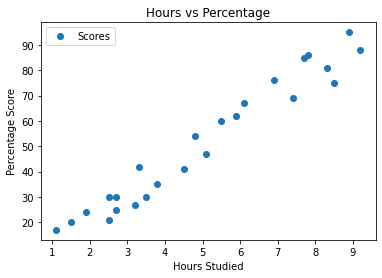

In [5]:
# Plotting the distribution of scores
df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

In [6]:
X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

print('X_arr shape: ', X.shape)
print('Y_arr shape: ', Y.shape)

X_arr shape:  (25, 1)
Y_arr shape:  (25,)


In [7]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state=0)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_val.shape)
print('y_test shape: ', y_val.shape)

X_train shape:  (20, 1)
y_train shape:  (20,)
X_test shape:  (5, 1)
y_test shape:  (5,)


In [17]:
linModel = LinearRegression()  
linModel.fit(X_train, y_train) 
print("Training Done.")

Training Done.


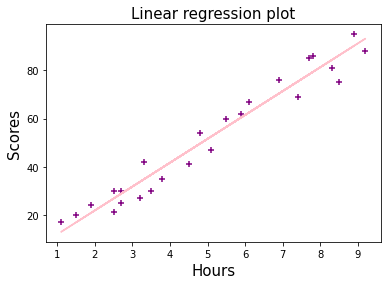

In [18]:
# Plotting the regression line
line = linModel.coef_*X +linModel.intercept_

# Plotting for the training data
plt.scatter(X, Y,color='purple',marker='+')
plt.plot(X, line,color='pink')
plt.ylabel("Scores",fontsize=15)
plt.xlabel("Hours",fontsize=15)
plt.title("Linear regression plot",fontsize=15)
plt.show()

In [19]:
#comparing the validation set predictions with the actual values
linPrediction = linModel.predict(X_val)
df = pd.DataFrame({'Actual': y_val, 'Predicted': linPrediction})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [20]:
print('Training Accuracy:',(100*linModel.score(X_train, y_train)).round(2),'%')
print('Validation Accuracy',(100*linModel.score(X_val, y_val)).round(2),'%')
MAE1=mean_absolute_error(linPrediction,y_val)
RMSE1=np.sqrt(mean_squared_error(y_val,linPrediction))
print('Mean Absolute error in Model 1:',MAE1.round(2))
print('Root Mean Squared Error in Model 1:',RMSE1.round(2))

Training Accuracy: 95.16 %
Validation Accuracy 94.55 %
Mean Absolute error in Model 1: 4.18
Root Mean Squared Error in Model 1: 4.65
